In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy
%matplotlib inline

In [23]:
july = pd.read_csv('tomslee_airbnb_new_york_1438_2017-07-12.csv')

In [19]:
july.info()

#note no bathroom or minstay info, some nulls in name

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41245 entries, 0 to 41244
Data columns (total 21 columns):
room_id                 41245 non-null int64
survey_id               41245 non-null int64
host_id                 41245 non-null int64
room_type               41245 non-null object
country                 0 non-null float64
city                    41245 non-null object
borough                 41245 non-null object
neighborhood            41245 non-null object
reviews                 41245 non-null int64
overall_satisfaction    41245 non-null float64
accommodates            41245 non-null int64
bedrooms                41245 non-null float64
bathrooms               0 non-null float64
price                   41245 non-null float64
minstay                 0 non-null float64
name                    41221 non-null object
property_type           41245 non-null object
last_modified           41245 non-null object
latitude                41245 non-null float64
longitude               412

In [20]:
july.head()

,room_id,survey_id,host_id,room_type,country,city,borough,neighborhood,reviews,overall_satisfaction,...,bedrooms,bathrooms,price,minstay,name,property_type,last_modified,latitude,longitude,location
0,7739955,1438,38614070,Shared room,NaN,New York,Queens,Jackson Heights,6,5.0,...,1.0,NaN,85.0,NaN,"Room TO SHARE by DAY,week,month",House,2017-07-15 21:30:31.858764,40.749909,-73.876880,0101000020E61000000EA14ACD1E7852C0F0FCA204FD5F...
1,7383173,1438,32628813,Shared room,NaN,New York,Brooklyn,Cypress Hills,14,4.0,...,1.0,NaN,90.0,NaN,Spacious Room: Close to Manhattan,House,2017-07-15 21:30:30.332828,40.678527,-73.889584,0101000020E6100000DFC2BAF1EE7852C0FC3905F9D956...
2,10250852,1438,35553123,Shared room,NaN,New York,Brooklyn,Sheepshead Bay,3,4.5,...,1.0,NaN,239.0,NaN,COZY COUCH,Apartment,2017-07-15 21:30:23.607950,40.583041,-73.957976,0101000020E61000009696917A4F7D52C0139D6516A14A...
3,2188359,1438,5029659,Shared room,NaN,New York,Manhattan,Hell's Kitchen,35,5.0,...,1.0,NaN,165.0,NaN,1 Bdrm Apt 1 Block from Times Sq.,Apartment,2017-07-15 21:30:21.832749,40.758374,-73.991955,0101000020E6100000A306D3307C7F52C0801134661261...
4,19661354,1438,70038324,Shared room,NaN,New York,Manhattan,Upper East Side,0,0.0,...,1.0,NaN,159.0,NaN,NYC Upper East / Midtown East Luxury 1BR,Apartment,2017-07-15 21:30:19.986579,40.761960,-73.959733,0101000020E610000016F9F5436C7D52C01A6EC0E78761...


In [24]:
july = july.drop(['room_id','survey_id', 'host_id', 'country', 'city', 'bathrooms', 'minstay', 'last_modified', 'location'], 1)
july.head()

,room_type,borough,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price,name,property_type,latitude,longitude
0,Shared room,Queens,Jackson Heights,6,5.0,4,1.0,85.0,"Room TO SHARE by DAY,week,month",House,40.749909,-73.876880
1,Shared room,Brooklyn,Cypress Hills,14,4.0,6,1.0,90.0,Spacious Room: Close to Manhattan,House,40.678527,-73.889584
2,Shared room,Brooklyn,Sheepshead Bay,3,4.5,6,1.0,239.0,COZY COUCH,Apartment,40.583041,-73.957976
3,Shared room,Manhattan,Hell's Kitchen,35,5.0,2,1.0,165.0,1 Bdrm Apt 1 Block from Times Sq.,Apartment,40.758374,-73.991955
4,Shared room,Manhattan,Upper East Side,0,0.0,2,1.0,159.0,NYC Upper East / Midtown East Luxury 1BR,Apartment,40.761960,-73.959733


In [25]:
july.describe()

,reviews,overall_satisfaction,accommodates,bedrooms,price,latitude,longitude
count,41245.000000,41245.000000,41245.000000,41245.000000,41245.000000,41245.000000,41245.000000
mean,17.463571,2.735774,2.851982,1.162395,136.103528,40.731183,-73.954717
std,31.917262,2.336536,1.865672,0.763021,166.615958,0.054861,0.042493
min,0.000000,0.000000,1.000000,0.000000,0.000000,40.508684,-74.239859
25%,1.000000,0.000000,2.000000,1.000000,65.000000,40.691208,-73.983521
50%,4.000000,4.500000,2.000000,1.000000,100.000000,40.725062,-73.956776
75%,19.000000,5.000000,4.000000,1.000000,160.000000,40.765689,-73.939254
max,454.000000,5.000000,16.000000,50.000000,9999.000000,40.908039,-73.702257


In [27]:
july.groupby('reviews').size().head()

reviews
0    9860
1    4359
2    3016
3    2075
4    1583
dtype: int64

In [28]:
february = pd.read_csv('tomslee_airbnb_new_york_0867_2017-02-17.csv')
february.describe()

,room_id,host_id,reviews,overall_satisfaction,accommodates,bedrooms,price,minstay,latitude,longitude
count,3.787800e+04,3.787800e+04,37878.000000,37878.000000,37878.000000,37878.000000,37878.000000,0.0,37878.000000,37878.000000
mean,9.595511e+06,2.955778e+07,15.902186,2.685121,2.816331,1.146365,137.902529,NaN,40.731280,-73.955408
std,5.312315e+06,3.071767e+07,29.151044,2.331900,1.812102,0.694639,182.995379,NaN,0.054648,0.041631
min,2.515000e+03,4.300000e+01,0.000000,0.000000,1.000000,0.000000,10.000000,NaN,40.499794,-74.240843
25%,4.921410e+06,4.928447e+06,1.000000,0.000000,2.000000,1.000000,65.000000,NaN,40.691467,-73.983817
50%,9.859656e+06,1.808137e+07,4.000000,4.500000,2.000000,1.000000,100.000000,NaN,40.724988,-73.957030
75%,1.442130e+07,4.591342e+07,17.000000,5.000000,4.000000,1.000000,160.000000,NaN,40.765898,-73.939695
max,1.733501e+07,1.170387e+08,406.000000,5.000000,16.000000,10.000000,10000.000000,NaN,40.911003,-73.708097


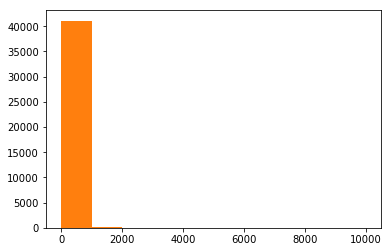

In [32]:
plt.hist(july.price)
plt.show()

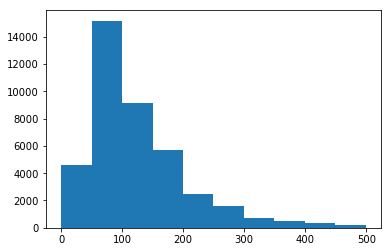

In [37]:
july_out = july[july.price < 500]

plt.hist(july_out.price)
plt.show()

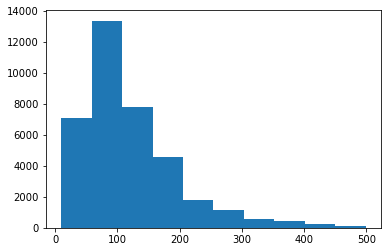

In [38]:
feb_out = february[february.price < 500]

plt.hist(feb_out.price)
plt.show()

In [46]:
def bootstrap_mean(data, nSample, nIter=10000):
    mean_list = []
    np.random.seed(100)

    for i in range(nIter):
        sample = np.random.choice(data, size = nSample)
        mean_list.append(np.mean(sample))

    # Convert to series
    series = pd.Series(mean_list)

    return series

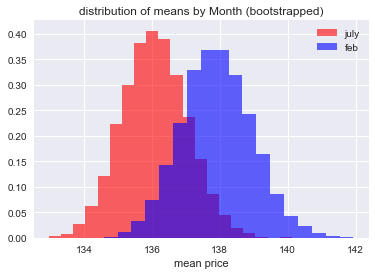

july 95% conf:  [ 134.26923083  138.0262075 ]
feb 95% conf:  [ 135.90555333  140.06561917]


In [49]:
means_j = bootstrap_mean(july.price, 30000)
means_f = bootstrap_mean(february.price, 30000)

#histogram
_ = plt.hist(means_j, bins = 20, normed=True, color='red', alpha = .6, label='july')
_ = plt.hist(means_f, bins = 20, normed=True, color='blue', alpha = .6, label='feb')
_ = plt.title("distribution of means by Month (bootstrapped)")
_ = plt.xlabel('mean price')
_ = plt.legend()

plt.show()

july_conf = np.percentile(means_j, [2.5, 97.5])
feb_conf = np.percentile(means_f, [2.5, 97.5])

print('july 95% conf: ', july_conf)
print('feb 95% conf: ', feb_conf)

In [51]:
#we want to test null hypothesis that july and feb have equivalent means

#shift data to match july mean
data_j_shifted = july.price 
data_f_shifted =february.price - february.price.mean() + july.price.mean()
#get new bootstrapped means
means_j = bootstrap_mean(data_j_shifted, 30000)
means_f = bootstrap_mean(data_f_shifted, 30000)

#get original diff of means to test against
sample_diff_mean= february.price.mean() - july.price.mean()
diff_means = means_f - means_j
p_value = np.sum(diff_means >= sample_diff_mean)/(len(diff_means))
print('p_value = ', p_value)

p_value =  0.1084


In [ ]:
#~11% of runs still had the same or higher mean difference than the original case. 
#p-value isn't low enough for statistic significance
#also, the difference is only ~$2, which isn't practically significant enough to warrant using more than the july data set.